In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TEST_DATA_PATH = 'data\\test.csv'
TRAIN_DATA_PATH = 'data\\train.csv'

In [3]:
train= pd.read_csv(TRAIN_DATA_PATH)
print(len(train.columns))
train

81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
column_name = train.columns.tolist()
nan_columns = []
for i in column_name:
    if train[i].isna().sum() > 500:
        nan_columns.append(i)
        print(f"\n{i} 컬럼의 NaN 개수:", train[i].isna().sum())
print(nan_columns)


Alley 컬럼의 NaN 개수: 1369

MasVnrType 컬럼의 NaN 개수: 872

FireplaceQu 컬럼의 NaN 개수: 690

PoolQC 컬럼의 NaN 개수: 1453

Fence 컬럼의 NaN 개수: 1179

MiscFeature 컬럼의 NaN 개수: 1406
['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [7]:
#nan값이 많은 칼럼 제외
new_train = train.drop(nan_columns, axis=1)
print(len(new_train.columns))


75


In [8]:
categorical_columns = new_train.select_dtypes(include=['object', 'category']).columns
non_categorical_columns = new_train.select_dtypes(include=['number']).columns
print("범주형 칼럼:", list(categorical_columns), len(categorical_columns))
print("비범주형 칼럼:", list(non_categorical_columns), len(non_categorical_columns))

범주형 칼럼: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 37
비범주형 칼럼: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolAre

In [9]:
#최종 결과 8개 선정하기
zero_columns = []
for i in non_categorical_columns:
    zero_count = (new_train[i] == 0).sum()
    if zero_count > 400:
        zero_columns.append(i)
        print(f"\n{i} 컬럼의 0 개수:", zero_count)
print(zero_columns)

non_categorical_columns=non_categorical_columns.drop(zero_columns)
non_categorical_columns=non_categorical_columns.drop("Id","SalePrice")
print((non_categorical_columns))




MasVnrArea 컬럼의 0 개수: 861

BsmtFinSF1 컬럼의 0 개수: 467

BsmtFinSF2 컬럼의 0 개수: 1293

2ndFlrSF 컬럼의 0 개수: 829

LowQualFinSF 컬럼의 0 개수: 1434

BsmtFullBath 컬럼의 0 개수: 856

BsmtHalfBath 컬럼의 0 개수: 1378

HalfBath 컬럼의 0 개수: 913

Fireplaces 컬럼의 0 개수: 690

WoodDeckSF 컬럼의 0 개수: 761

OpenPorchSF 컬럼의 0 개수: 656

EnclosedPorch 컬럼의 0 개수: 1252

3SsnPorch 컬럼의 0 개수: 1436

ScreenPorch 컬럼의 0 개수: 1344

PoolArea 컬럼의 0 개수: 1453

MiscVal 컬럼의 0 개수: 1408
['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'MoSold', 'YrSold',
       'SalePrice'],
      dtype='object')


In [5]:
# for i in non_categorical_columns:
#     plt.figure(figsize=(3, 2))
#     sns.violinplot(data=new_train, y=i)
#     plt.title(f'Distribution of {i}')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

In [14]:
# n_cols = 3  # 한 행에 표시할 그래프 수
# n_rows = (len(non_categorical_columns) + 1) // 2  # 필요한 행 수 계산

# # 전체 그래프 크기 설정
# plt.figure(figsize=(12, 4*n_rows))

# # 각 변수별 violin plot 생성
# for idx, column in enumerate(non_categorical_columns, 1):
#     plt.subplot(n_rows, n_cols, idx)
#     sns.violinplot(data=new_train, y=column)
#     plt.title(f'Distribution of {column}')
#     plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()

In [16]:
# choosed_columns=categorical_columns.tolist()
train= pd.read_csv(TRAIN_DATA_PATH)
test_data=pd.read_csv(TEST_DATA_PATH)
choosed_columns=["LotArea","YearBuilt","OverallQual","1stFlrSF","GrLivArea","GarageArea","MoSold","YrSold","SalePrice"]
y_column_name="SalePrice"
#데이터 최종확정
# new_test_data=test_data[choosed_columns].copy()
new_train_data=train[choosed_columns].copy()

In [17]:
#반응 변수는 Value after tax으로 하고, 다른것들중에 설명변수
#각 품목을 기준으로, 시간대별 정렬. 그다음에 분석

for i in choosed_columns:
    average= new_train_data[i].mean()
    variance= new_train_data[i].var()
    print(f"{i}의 평균: {average}, 분산: {variance}")



LotArea의 평균: 10516.828082191782, 분산: 99625649.65034176
YearBuilt의 평균: 1971.267808219178, 분산: 912.2154126019886
OverallQual의 평균: 6.0993150684931505, 분산: 1.9126794482991725
1stFlrSF의 평균: 1162.626712328767, 분산: 149450.07920371433
GrLivArea의 평균: 1515.463698630137, 분산: 276129.63336259587
GarageArea의 평균: 472.9801369863014, 분산: 45712.51022890514
MoSold의 평균: 6.321917808219178, 분산: 7.309594674528434
YrSold의 평균: 2007.8157534246575, 분산: 1.7638366492343232
SalePrice의 평균: 180921.19589041095, 분산: 6311111264.297448


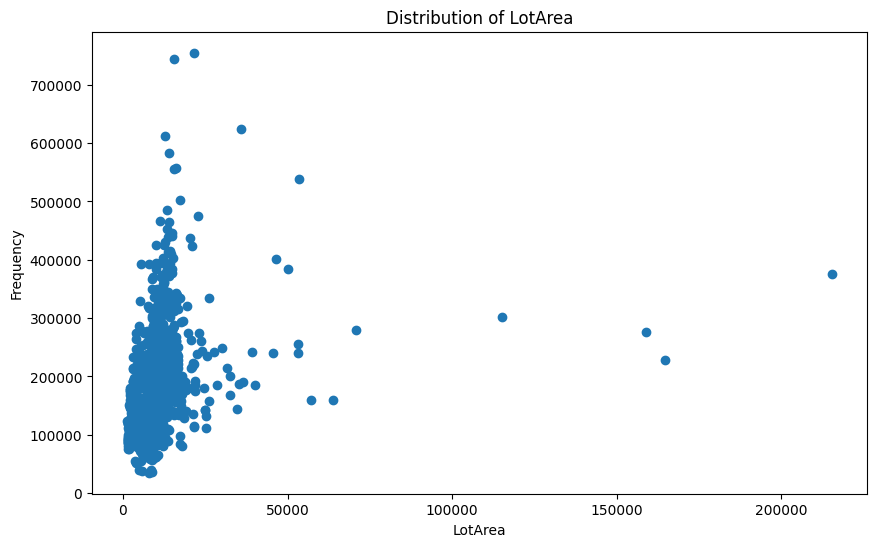

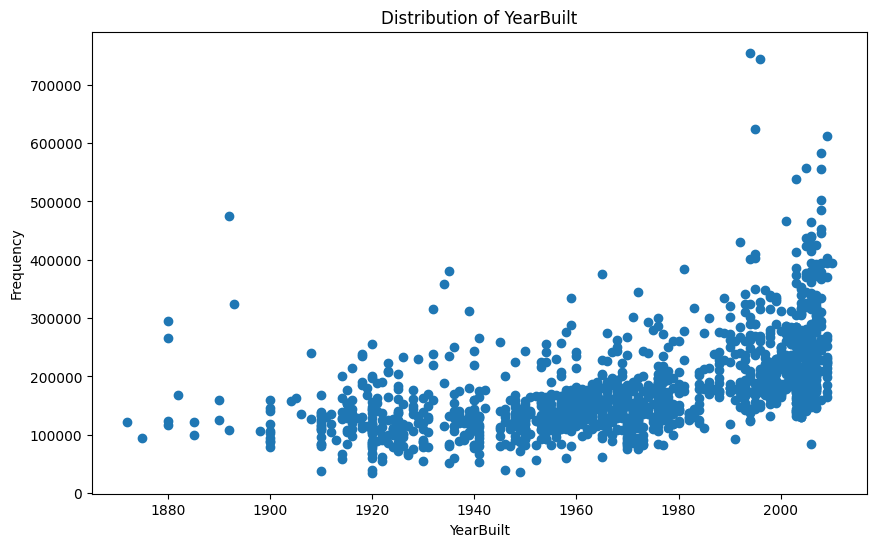

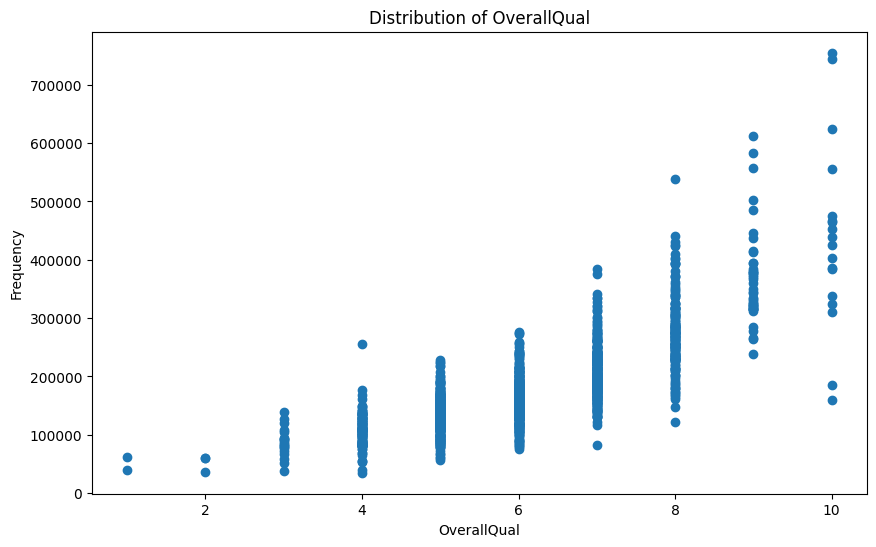

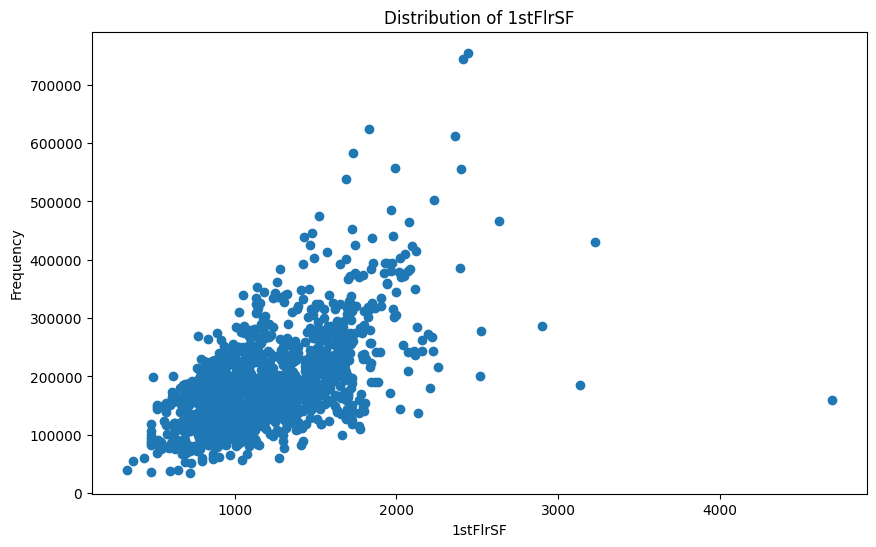

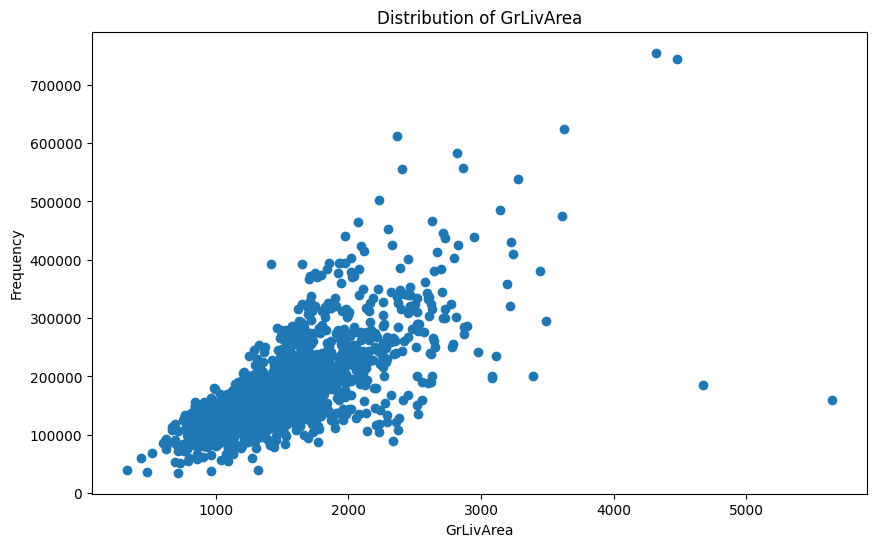

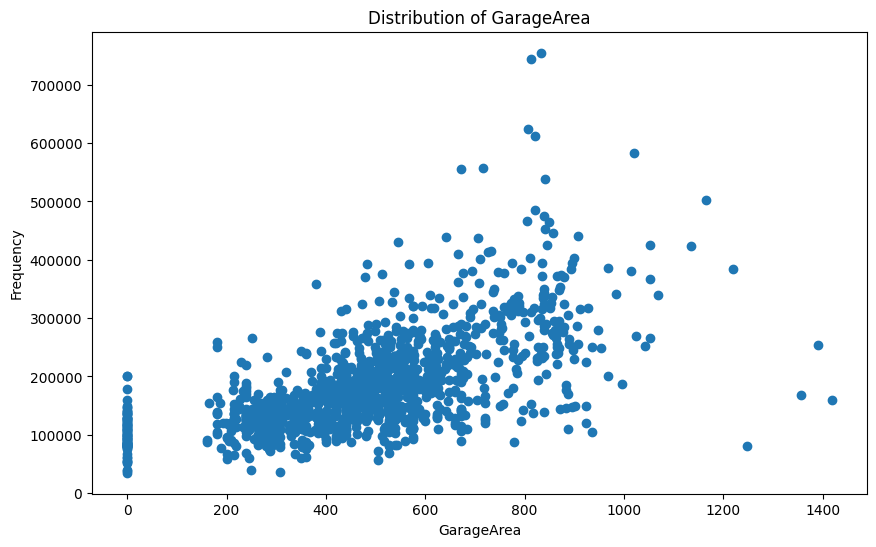

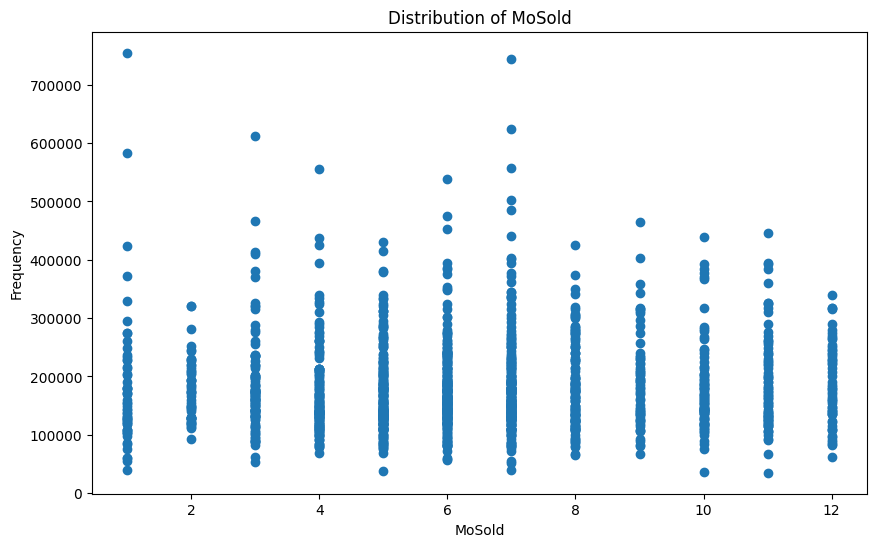

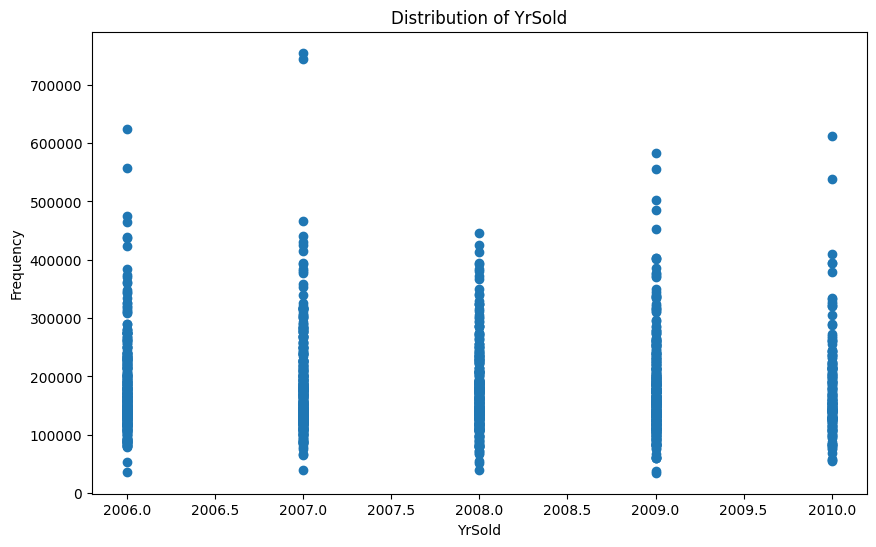

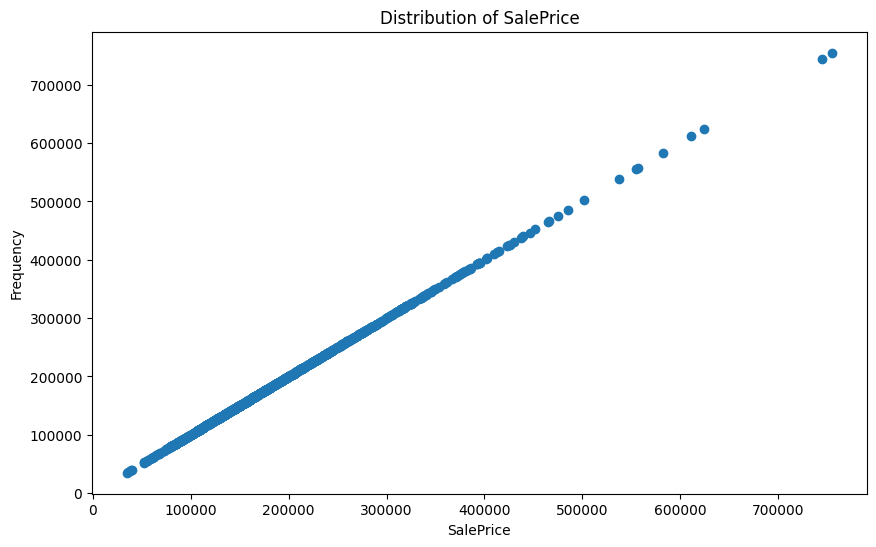

In [18]:
for i in choosed_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(new_train_data[i], new_train_data[y_column_name])
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()



c:\anaconda3\envs\data_algorithm\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\anaconda3\envs\data_algorithm\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\anaconda3\envs\data_algorithm\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pr

정확도: 0.02054794520547945

분류 보고서:
              precision    recall  f1-score   support

       35311       0.00      0.00      0.00         1
       40000       0.00      0.00      0.00         1
       55993       0.00      0.00      0.00         1
       60000       0.00      0.00      0.00         1
       64500       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         1
       67000       0.00      0.00      0.00         2
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         1
       75000       0.00      0.00      0.00         1
       75500       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         1
       81000       0.00      0.00      0.00         1
       82500       0.00      0.00      0.00         0
       84500       0.00      0.00      0.00         1
       84900       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00    

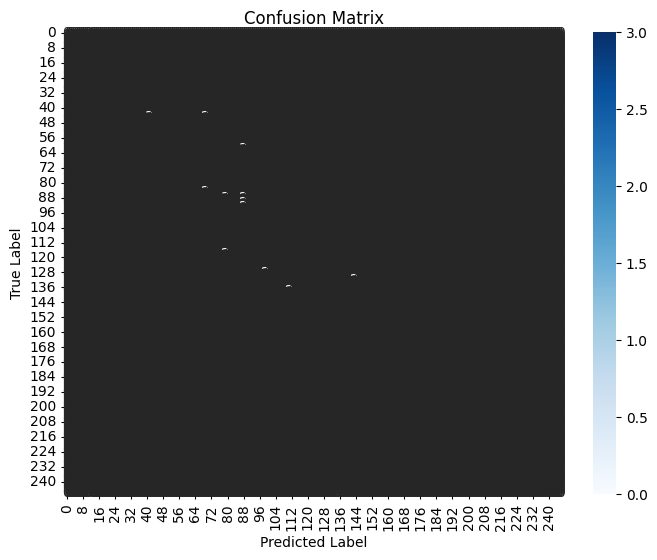

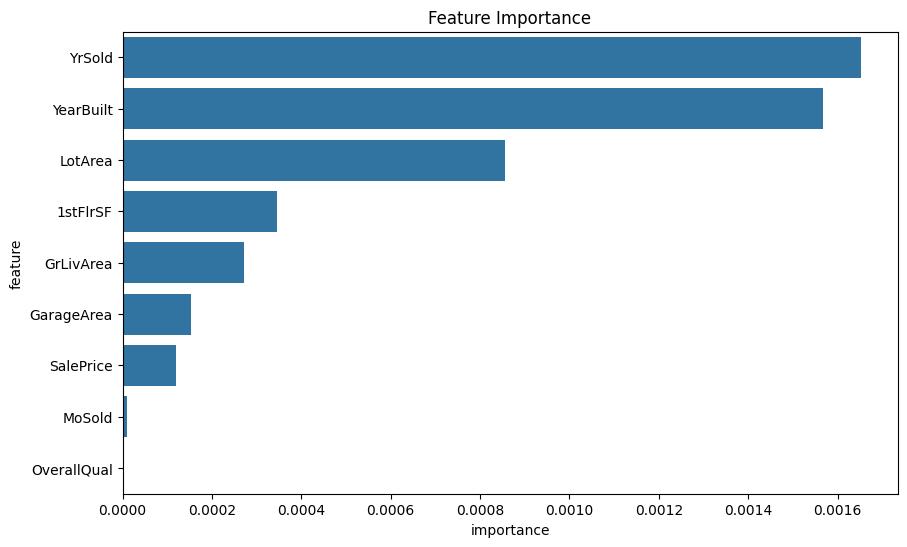

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

test_data=pd.read_csv(TEST_DATA_PATH)
X_train=train[choosed_columns].copy()
y_train=train[y_column_name].copy()
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=1000)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# 모델 평가
print("정확도:", accuracy_score(y_test, y_pred))
print("\n분류 보고서:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, 
            fmt='d',
            cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 특성 중요도 확인
feature_importance = pd.DataFrame({
    'feature': choosed_columns,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()